# Project

# 1. Describe about dataset

I use drinks.csv, which shows the average number of drinks consumed by serving annually, classified by country and alcohol type type.
This data is from https://www.data.world/

total_litres_of_pure_alcohol is calculataed by the below formula.

total_litres_of_pure_alcohol = 520 * 0.045 * beer_servings + 35 * 0.400 * spirit_servings + 150 * 0.135 * wine_servings



# 2. Importing dataset

In [408]:
import pandas as pd
import numpy as np
data = pd.read_csv("drinks.csv")
data = data.set_index("country")
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Afghanistan,0,0,0,0.0000
Albania,89,132,54,4.8675
Algeria,25,0,14,0.6903
Andorra,245,138,312,12.3015
Angola,217,57,45,5.6463


# 2. Missing Values

In [409]:
# Replace values of '0'  in 'total_litres_of_pure_alcohol' with NaN.

data["total_litres_of_pure_alcohol"]= data["total_litres_of_pure_alcohol"].replace(0,np.nan)

In [410]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Afghanistan,0,0,0,NaN
Albania,89,132,54,4.8675
Algeria,25,0,14,0.6903
Andorra,245,138,312,12.3015
Angola,217,57,45,5.6463


In [411]:
# Drop the missing values.
data.dropna().head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Albania,89,132,54,4.8675
Algeria,25,0,14,0.6903
Andorra,245,138,312,12.3015
Angola,217,57,45,5.6463
Antigua & Barbuda,102,128,45,4.8675


In [412]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 4 columns):
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    180 non-null float64
dtypes: float64(1), int64(3)
memory usage: 7.5+ KB


In [413]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,180.000000
mean,105.906736,81.875648,49.958549,4.511927
std,101.204988,89.128390,80.019062,3.696206
min,0.000000,0.000000,0.000000,0.088500
25%,20.000000,4.000000,1.000000,1.004475
50%,71.000000,56.000000,8.000000,3.823200
75%,188.000000,131.000000,62.000000,7.159650
max,376.000000,438.000000,370.000000,13.328100


# 3. Grading by alcohol consumption

In [416]:
# Make a function to grade by pure alcohol comsumption. I divied 4 categogires, which are 'low', 'medium', 'high', and 'extreme.'

def Graded(liter):
    if 0 < liter["total_litres_of_pure_alcohol"] < 4:
        grade = "low"
    elif 4 <= liter["total_litres_of_pure_alcohol"] < 8:
        grade = "medium"
    elif 8 <= liter["total_litres_of_pure_alcohol"] < 12:
         grade = "high"
    else:
        grade = "Extreme"
    return grade


In [417]:
# Add a new column to show grades.

data["grade_by_alcohol_consumption"] = data.apply(Graded, axis=1)
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,grade_by_alcohol_consumption
country,,,,,
Afghanistan,0,0,0,NaN,Extreme
Albania,89,132,54,4.8675,medium
Algeria,25,0,14,0.6903,low
Andorra,245,138,312,12.3015,Extreme
Angola,217,57,45,5.6463,medium


In [418]:
# Sort values which has'low grade.'

data.sort_values(by="total_litres_of_pure_alcohol", inplace=True)
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,grade_by_alcohol_consumption
country,,,,,
Comoros,1,3,1,0.0885,low
Saudi Arabia,0,5,0,0.0885,low
Niger,3,2,1,0.1062,low
Yemen,6,0,0,0.1062,low
Indonesia,5,1,0,0.1062,low


# 4. Rank 

In [419]:
# Add new column 'Rank' to show rank of 'total_litres_of_pure_alcohol.'

data['Rank'] = data['total_litres_of_pure_alcohol'].rank(ascending=False)

In [420]:
# Sort by rank. Denmark is the hightest comsumption in alcohol.

data.sort_values(by='Rank', inplace=True)
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,grade_by_alcohol_consumption,Rank
country,,,,,,
Denmark,224,251,278,13.3281,Extreme,1.0
Andorra,245,138,312,12.3015,Extreme,2.0
Grenada,199,438,28,11.7705,high,3.5
Czech Republic,361,170,134,11.7705,high,3.5
France,127,151,370,11.4696,high,5.0


In [421]:
# Comoros  and Saudi Arabia are the contries of the lowest in alcohol comsumtion.

low_consumption= data[data['grade_by_alcohol_consumption']=='low'].sort_values(by='Rank', ascending=False)
low_consumption.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,grade_by_alcohol_consumption,Rank
country,,,,,,
Comoros,1,3,1,0.0885,low,179.5
Saudi Arabia,0,5,0,0.0885,low,179.5
Niger,3,2,1,0.1062,low,176.0
Yemen,6,0,0,0.1062,low,176.0
Indonesia,5,1,0,0.1062,low,176.0


In [422]:
# Manibia is the country of the most consumption in beer.

data.loc[data['beer_servings'].idxmax()]

beer_servings                      376
spirit_servings                      3
wine_servings                        1
total_litres_of_pure_alcohol     6.726
grade_by_alcohol_consumption    medium
Rank                                54
Name: Namibia, dtype: object

In [423]:
# France is the country of the most consumption in wine.

data.loc[data['wine_servings'].idxmax()]

beer_servings                       127
spirit_servings                     151
wine_servings                       370
total_litres_of_pure_alcohol    11.4696
grade_by_alcohol_consumption       high
Rank                                  5
Name: France, dtype: object

In [424]:
# Grenada is the country of the most consumption in Spirit.

data.loc[data['spirit_servings'].idxmax()]

beer_servings                       199
spirit_servings                     438
wine_servings                        28
total_litres_of_pure_alcohol    11.7705
grade_by_alcohol_consumption       high
Rank                                3.5
Name: Grenada, dtype: object

# 5. Grouping data

In [425]:
# Group by "grade_by_alcohol_consumption" 
# the values are each mean following by types of alcohol and alcoho consumption.

data_groupby = data.groupby("grade_by_alcohol_consumption")
data_group_sorted= data_groupby.mean().sort_values("total_litres_of_pure_alcohol", ascending=False)
data_groups = data_group_sorted.drop(['total_litres_of_pure_alcohol','Rank'], axis=1)
data_groups

,beer_servings,spirit_servings,wine_servings
grade_by_alcohol_consumption,,,
Extreme,31.266667,25.933333,39.333333
high,246.527778,167.305556,150.083333
medium,148.000000,132.686275,57.784314
low,38.989011,28.824176,7.714286


In [426]:
#  Also, group by "grade_by_alcohol_consumption"but it only shows "total_litres_of_pure_alcohol."

data_groupby = data.groupby("grade_by_alcohol_consumption")
data_group_sorted= data_groupby.mean().sort_values("total_litres_of_pure_alcohol", ascending=False)
data_groups = data_group_sorted.drop(['beer_servings', 'spirit_servings', 'wine_servings','Rank'], axis=1)
data_groups

,total_litres_of_pure_alcohol
grade_by_alcohol_consumption,
Extreme,12.814800
high,9.981325
medium,5.990929
low,1.336836


# 6. Bar graph

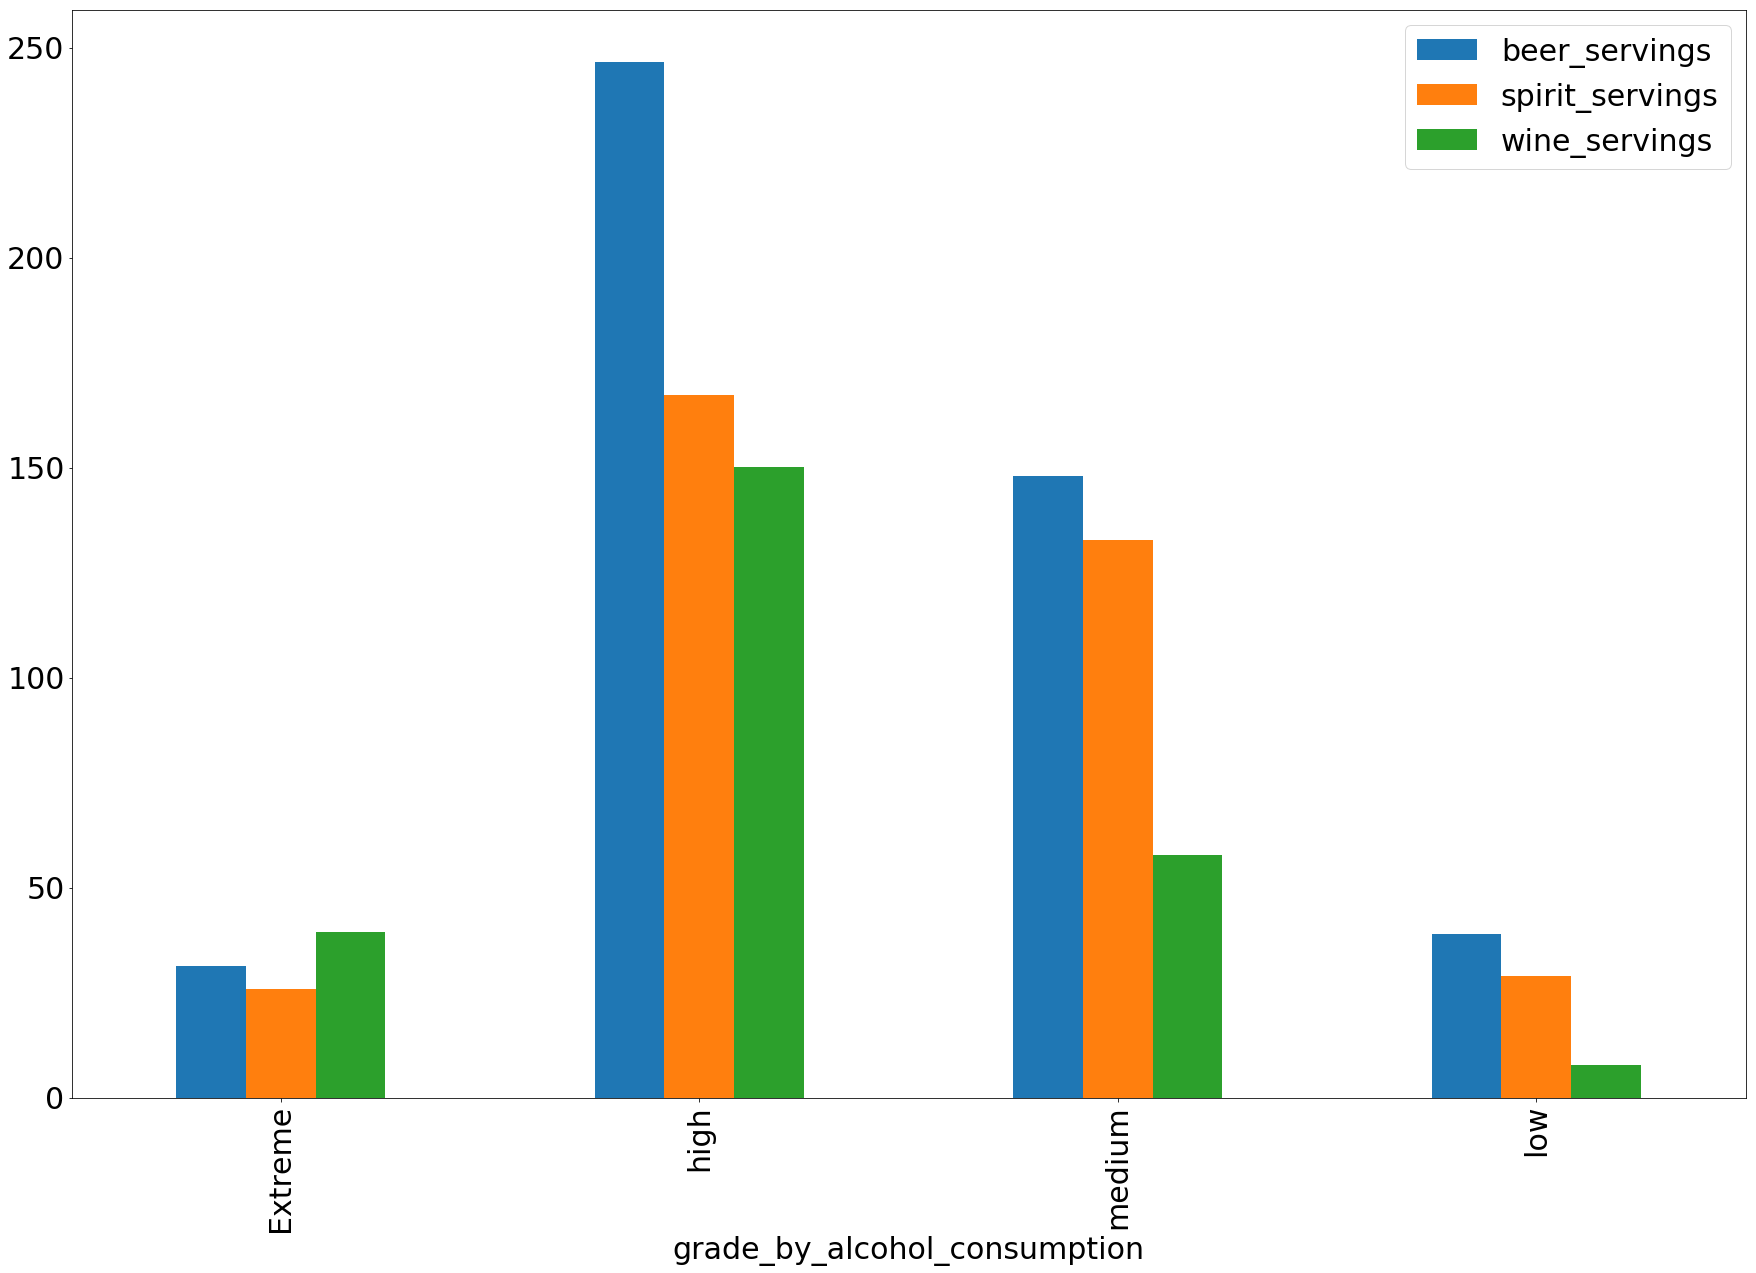

In [403]:
# Create bar graph, which shows each type of alcohol consumptions group by grades.

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [30,20]
plt.rcParams.update({'font.size': 30})
data_groups.plot.bar()

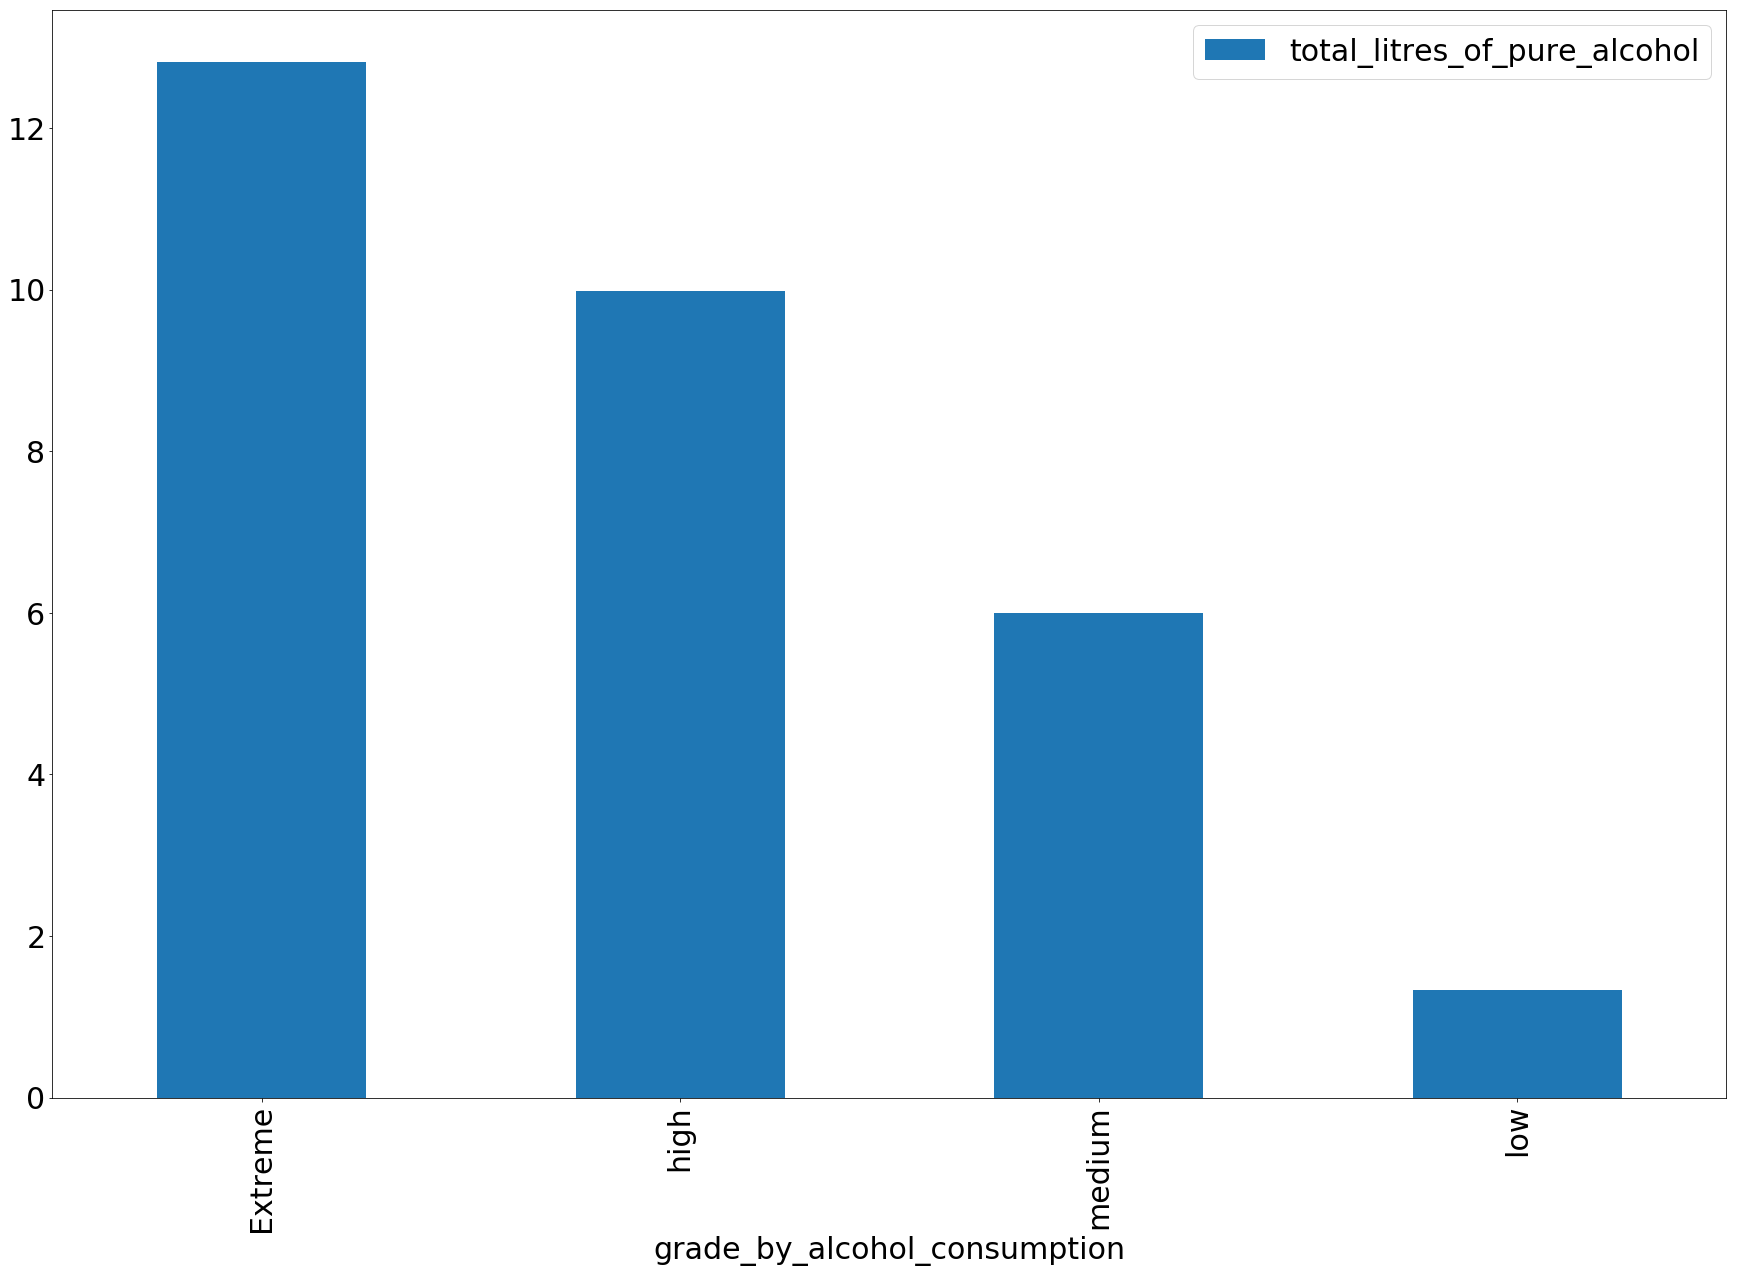

In [406]:
# Create another bar graph, which shows the total liter of pure alcohol consumption group by grades.

plt.rcParams["figure.figsize"] = [30,20]
plt.rcParams.update({'font.size': 30})
data_groups.plot.bar()